# My Mobapp Studio

Welcome!

We are very pleased to hired as Junior Data Scientist here at My MobApp Studio. As I told you during your very first interview, data science is very new for us but you succeeded to convinced that it's one of the key factor to be successful in our digital world, as you said: data is life.

Last management meeting, we decided we will allocate resource to create a new mobile app and I have to say that I have already received multiple emails showing the enthusiasm from our employees who wants to be part of the team. We have all in-house the different skills we need to make this project a success (marketing, design, game design, software engineer)

Before moving forward, I will need a report on the market. In order to complete our portfolio, this new App will be first publish on the Google Play Store, so you can focus your research on it.

I will just shoot some questions here:

What is the size of the market? numbers of download and $
Same question but per category? (percentages please)
Depending on each category, what are the ratio of download per app?
Any additional information you will find useful for us to take the right decision.
I remembered you told me you are also a developer, I'm myself an old developer, so I'm thinking maybe if you can build some code it would be great and display your results on the terminal.

I will invite my vp marketing and vp designer to the meeting, formatting will be a real plus, and if they have additional questions be ready to jump back in the code.

Best, John

# Installing Needed packages

In [1]:
!pip install seaborn

     |████████████████████████████████| 292 kB 10.0 MB/s            


# Importing Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Dataset

In [3]:
def load_dataset():
    df = pd.read_csv('googleplaystore.csv')
    return df
dataset = load_dataset()

# Summarize Dataset

In [4]:
def print_summarize_dataset(dataset):
    print(dataset.head(5))
    print(dataset.shape)
    print(dataset.describe())
    print(dataset.info())
print_summarize_dataset(dataset)

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

# Clean Dataset

In [5]:
def clean_dataset(dataset):
    row_index = 10472
    start_col = 1
    for i in range(len(dataset.columns) -2, start_col -1, -1):
        dataset.iloc[row_index, i + 1] = dataset.iloc[row_index, i]
        dataset.iloc[10472, 1] = np.nan    
        dataset.iloc[[row_index]]
    
    dataset['Installs'] = dataset['Installs'].replace({'[,+]':''}, regex=True).astype(int)
    dataset['Price'] = dataset['Price'].replace({'[$]':''}, regex=True).astype(float)
    dataset['Rating'] = dataset['Rating'].astype(float)
    dataset['Reviews'] = dataset['Reviews'].astype(int)
    dataset = dataset.drop_duplicates()
    dataset.info()
    return dataset
clean_dataset(dataset)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10358 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Print Histograms

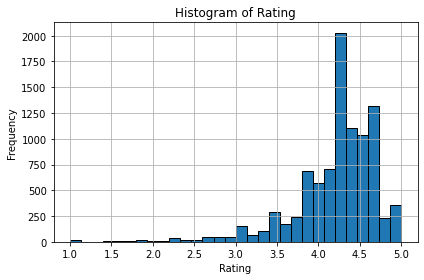

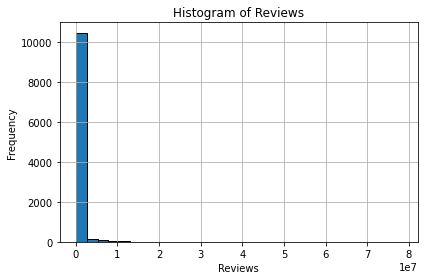

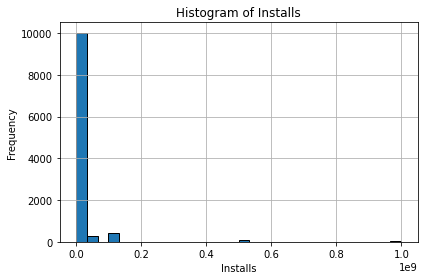

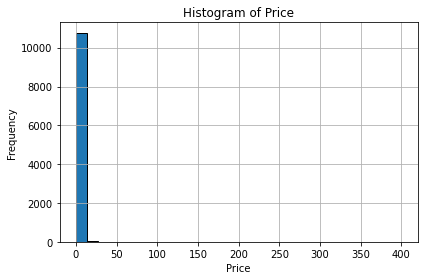

In [6]:
def print_histograms(dataset):
    numerical_cols = ['Rating', 'Reviews','Installs','Price']
    for col in numerical_cols:
        plt.figure(figsize=(6, 4))
        dataset[col].hist(bins=30, edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
print_histograms(dataset)

## Compute Correlation Matrix

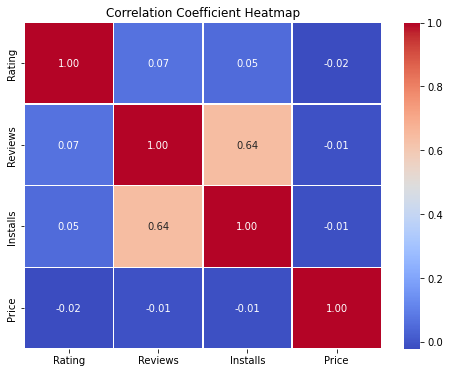

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068141,0.051355,-0.021903
Reviews,0.068141,1.000000,0.643123,-0.009666
Installs,0.051355,0.643123,1.000000,-0.011688
Price,-0.021903,-0.009666,-0.011688,1.000000


In [7]:
def compute_correlations_matrix(dataset):
    dataset.corr()
    correlation_matrix = dataset.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Coefficient Heatmap')
    plt.show()
    return dataset.corr()
compute_correlations_matrix(dataset)

## Print Scatter Matrix

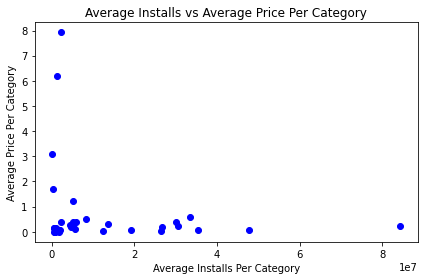

In [8]:
def print_scatter_matrix():
    plt.figure(figsize=(6, 4))
    plt.scatter(dataset.groupby('Category')['Installs'].mean(), dataset.groupby('Category')['Price'].mean(), color='blue')
    plt.title('Average Installs vs Average Price Per Category')
    plt.xlabel('Average Installs Per Category')
    plt.ylabel('Average Price Per Category')
    plt.tight_layout()
    plt.show()
print_scatter_matrix()

## Size of Market (Based on Downloads and Revenue)

In [9]:
# Calculates the total number of downloads
total_downloads = dataset["Installs"].sum()
total_revenue = (dataset["Installs"] * dataset["Price"]).sum()
avg_installs = dataset["Installs"].mean()

print(f"Total Market Downloads: {total_downloads:,}")
print(f"Total Estimated Revenue: ${total_revenue:,}+")

Total Market Downloads: 167,633,434,487
Total Estimated Revenue: $388,629,445.79+


In [12]:
# Installs per Category in Percentages
size_p_category = dataset.groupby('Category')['Installs'].mean()
percentages = size_p_category / size_p_category.sum() * 100
for categories, percentages in percentages.round(2).items():
    print(f'Category: {categories}, Percentage: {percentages}%')

Category: ART_AND_DESIGN, Percentage: 0.45%
Category: AUTO_AND_VEHICLES, Percentage: 0.15%
Category: BEAUTY, Percentage: 0.12%
Category: BOOKS_AND_REFERENCE, Percentage: 1.97%
Category: BUSINESS, Percentage: 0.52%
Category: COMICS, Percentage: 0.22%
Category: COMMUNICATION, Percentage: 20.0%
Category: DATING, Percentage: 0.27%
Category: EDUCATION, Percentage: 1.32%
Category: ENTERTAINMENT, Percentage: 4.57%
Category: EVENTS, Percentage: 0.06%
Category: FAMILY, Percentage: 1.23%
Category: FINANCE, Percentage: 0.57%
Category: FOOD_AND_DRINK, Percentage: 0.51%
Category: GAME, Percentage: 7.27%
Category: HEALTH_AND_FITNESS, Percentage: 1.1%
Category: HOUSE_AND_HOME, Percentage: 0.45%
Category: LIBRARIES_AND_DEMO, Percentage: 0.18%
Category: LIFESTYLE, Percentage: 0.33%
Category: MAPS_AND_NAVIGATION, Percentage: 1.25%
Category: MEDICAL, Percentage: 0.03%
Category: NEWS_AND_MAGAZINES, Percentage: 6.28%
Category: PARENTING, Percentage: 0.12%
Category: PERSONALIZATION, Percentage: 1.41%
Catego

In [14]:
# Revenue per Category in Percentages
dataset['Revenue'] = dataset['Installs'] * dataset['Price']
total_revenue_category = dataset.groupby('Category')['Revenue'].sum()
total_revenue_category = total_revenue_category.astype(int)
perc = (total_revenue_category / total_revenue) * 100
perc
for categories, percentages in perc.round(2).items():
    print(f'Category: {categories}, Percentage: {percentages}%')

Category: ART_AND_DESIGN, Percentage: 0.01%
Category: AUTO_AND_VEHICLES, Percentage: 0.03%
Category: BEAUTY, Percentage: 0.0%
Category: BOOKS_AND_REFERENCE, Percentage: 0.02%
Category: BUSINESS, Percentage: 0.53%
Category: COMICS, Percentage: 0.0%
Category: COMMUNICATION, Percentage: 1.09%
Category: DATING, Percentage: 0.02%
Category: EDUCATION, Percentage: 0.62%
Category: ENTERTAINMENT, Percentage: 0.21%
Category: EVENTS, Percentage: 0.0%
Category: FAMILY, Percentage: 47.87%
Category: FINANCE, Percentage: 6.62%
Category: FOOD_AND_DRINK, Percentage: 0.07%
Category: GAME, Percentage: 10.55%
Category: HEALTH_AND_FITNESS, Percentage: 0.44%
Category: HOUSE_AND_HOME, Percentage: 0.0%
Category: LIBRARIES_AND_DEMO, Percentage: 0.0%
Category: LIFESTYLE, Percentage: 14.82%
Category: MAPS_AND_NAVIGATION, Percentage: 0.32%
Category: MEDICAL, Percentage: 3.49%
Category: NEWS_AND_MAGAZINES, Percentage: 0.0%
Category: PARENTING, Percentage: 0.06%
Category: PERSONALIZATION, Percentage: 2.64%
Category

In [13]:
#An array with the number of installation per category
num_installs = dataset.groupby('Category')['Installs'].sum()
num_installs

Category
ART_AND_DESIGN           124338100
AUTO_AND_VEHICLES         53130211
BEAUTY                    27197050
BOOKS_AND_REFERENCE     1921469576
BUSINESS                1001914865
COMICS                    56086150
COMMUNICATION          32647276251
DATING                   264310807
EDUCATION                871452000
ENTERTAINMENT           2869160000
EVENTS                    15973161
FAMILY                 10258263505
FINANCE                  876648734
FOOD_AND_DRINK           273898751
GAME                   35086024415
HEALTH_AND_FITNESS      1583072512
HOUSE_AND_HOME           168712461
LIBRARIES_AND_DEMO        62995910
LIFESTYLE                537643539
MAPS_AND_NAVIGATION      724281890
MEDICAL                   53257437
NEWS_AND_MAGAZINES      7496317760
PARENTING                 31521110
PERSONALIZATION         2325494782
PHOTOGRAPHY            10088247655
PRODUCTIVITY           14176091369
SHOPPING                3247848785
SOCIAL                 14069867902
SPORTS     

## Ratio of Downloads per App (Based on Category)

In [15]:
download_ratio = dataset.groupby('Category')['Installs'].sum() // dataset.groupby('Category')['App'].count()
print('Ratio of Downloads per App(Based on Category):\n')
for category, ratio in download_ratio.sort_values(ascending=False).items():
    print(f"Category: {category}, Download Ratio: {ratio}/App in Category.")

Ratio of Downloads per App(Based on Category):

Category: COMMUNICATION, Download Ratio: 84359886/App in Category.
Category: SOCIAL, Download Ratio: 47694467/App in Category.
Category: VIDEO_PLAYERS, Download Ratio: 35554301/App in Category.
Category: PRODUCTIVITY, Download Ratio: 33434177/App in Category.
Category: GAME, Download Ratio: 30669601/App in Category.
Category: PHOTOGRAPHY, Download Ratio: 30114172/App in Category.
Category: TRAVEL_AND_LOCAL, Download Ratio: 26623593/App in Category.
Category: NEWS_AND_MAGAZINES, Download Ratio: 26488755/App in Category.
Category: ENTERTAINMENT, Download Ratio: 19256107/App in Category.
Category: TOOLS, Download Ratio: 13585731/App in Category.
Category: SHOPPING, Download Ratio: 12491726/App in Category.
Category: BOOKS_AND_REFERENCE, Download Ratio: 8318050/App in Category.
Category: PERSONALIZATION, Download Ratio: 5932384/App in Category.
Category: EDUCATION, Download Ratio: 5586230/App in Category.
Category: MAPS_AND_NAVIGATION, Downlo

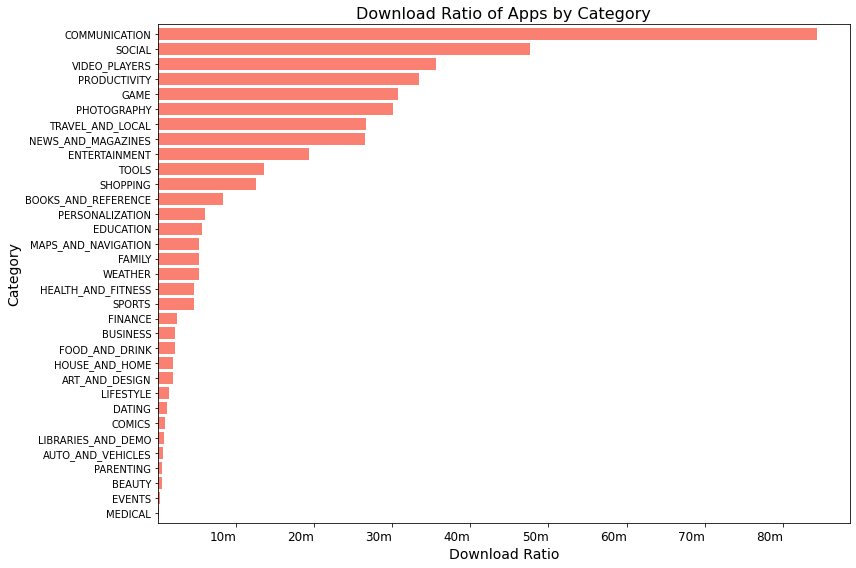

In [16]:
download_ratio_sorted = download_ratio.sort_values()
plt.figure(figsize=(12, 8))
download_ratio_sorted.plot(kind='barh', color='salmon', width=0.8)
plt.title('Download Ratio of Apps by Category', fontsize=16)
plt.xlabel('Download Ratio', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks([10000000,20000000,30000000,40000000,50000000,60000000,70000000,80000000],['10m','20m','30m','40m','50m','60m','70m','80m'], ha='right', fontsize=12)
plt.tight_layout()
plt.show()

## Analysis of Family Category

In [17]:
dataset = dataset.drop(index=4347)
family = dataset[dataset['Category'] == 'FAMILY']
paid_family = family[family['Type'] == 'Paid']
pop_paid_family = paid_family.sort_values(by='Installs', ascending=False).head(10)
pop_paid_family

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,69900000.0
8860,Bloons TD 5,FAMILY,4.6,190086,94M,1000000,Paid,2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,2990000.0
4260,Cut the Rope GOLD,FAMILY,4.6,61264,43M,1000000,Paid,0.99,Everyone,Puzzle,"June 19, 2018",3.7.0,4.1 and up,990000.0
2242,Card Wars - Adventure Time,FAMILY,4.3,129603,23M,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"February 11, 2016",1.11.0,2.3.3 and up,2990000.0
9678,Where's My Water?,FAMILY,4.7,188740,69M,1000000,Paid,1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,1990000.0
6675,Infinity Dungeon VIP,FAMILY,4.3,21804,44M,1000000,Paid,0.99,Everyone 10+,Role Playing,"July 3, 2018",2.6.6,2.3 and up,990000.0
9154,NBA JAM by EA SPORTS™,FAMILY,4.3,56444,43M,500000,Paid,4.99,Everyone,Sports;Action & Adventure,"February 8, 2017",04.00.40,2.3 and up,2495000.0
6936,Hitman GO,FAMILY,4.6,84114,23M,500000,Paid,0.99,Everyone 10+,Puzzle,"July 5, 2018",1.13.108869,2.3.3 and up,495000.0
5627,Five Nights at Freddy's 2,FAMILY,4.6,73919,40M,500000,Paid,2.99,Teen,Strategy,"November 15, 2014",1.07,2.3 and up,1495000.0
9478,Farming Simulator 16,FAMILY,4.2,32812,14M,500000,Paid,2.99,Everyone,Simulation;Education,"April 10, 2018",1.1.1.6,4.0.3 and up,1495000.0


In [18]:
gen_paid_family = paid_family.groupby('Genres')['Installs'].sum()
pop_gen_pd_fam = gen_paid_family.sort_values(ascending=False).head(10)
pop_gen_pd_fam

Genres
Arcade;Action & Adventure    10110000
Role Playing                  1992100
Puzzle                        1990620
Strategy                      1895500
Puzzle;Brain Games            1100000
Card;Action & Adventure       1000000
Sports;Action & Adventure      600000
Education;Pretend Play         587000
Simulation;Education           500000
Casual;Pretend Play            261000
Name: Installs, dtype: int64

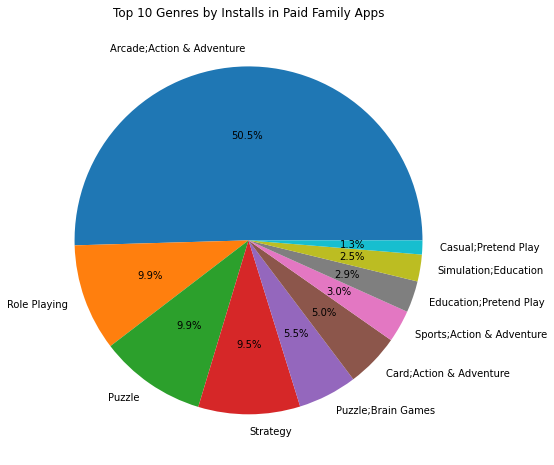

In [19]:
plt.figure(figsize=(8, 8))
pop_gen_pd_fam.plot(kind='pie', autopct='%1.1f%%', legend=False)
plt.title('Top 10 Genres by Installs in Paid Family Apps')
plt.ylabel('')
plt.show()

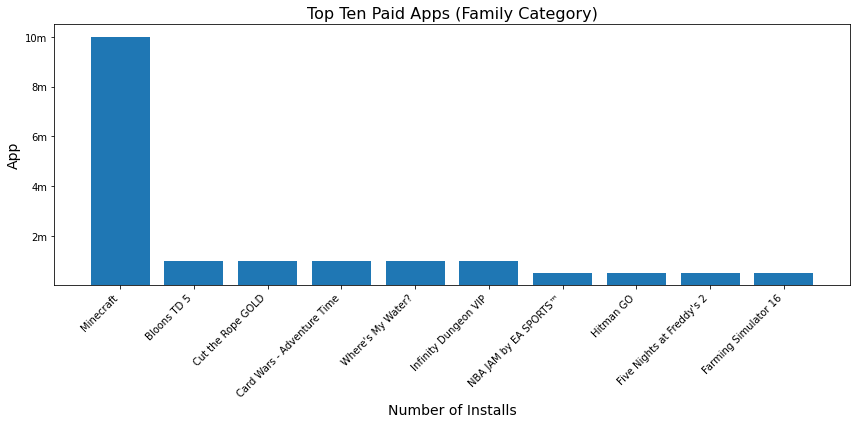

In [20]:
plt.figure(figsize=(12, 6))
plt.bar(pop_paid_family['App'], pop_paid_family['Installs']) 
plt.title('Top Ten Paid Apps (Family Category)', fontsize=16)
plt.xlabel('Number of Installs', fontsize=14)
plt.ylabel('App', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks([2000000,4000000,6000000,8000000,10000000],['2m','4m','6m','8m','10m'])
plt.tight_layout()
plt.show()

## Analysis of Categories

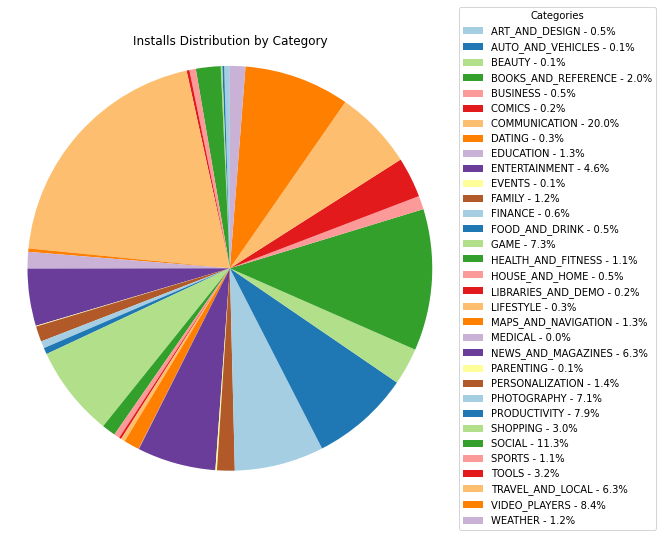

In [21]:
# Installs Distribution by Category
size_p_category = dataset.groupby('Category')['Installs'].mean()
percentages = size_p_category / size_p_category.sum() * 100
fig, ax = plt.subplots(figsize=(8, 8))
wedges, _ = ax.pie(size_p_category, 
                   startangle=90, 
                   colors=plt.cm.Paired.colors) 
legend_labels = [f"{category} - {percent:.1f}%" for category, percent in zip(size_p_category.index, percentages)]
plt.legend(wedges, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Installs Distribution by Category")
plt.axis('equal')
plt.show()

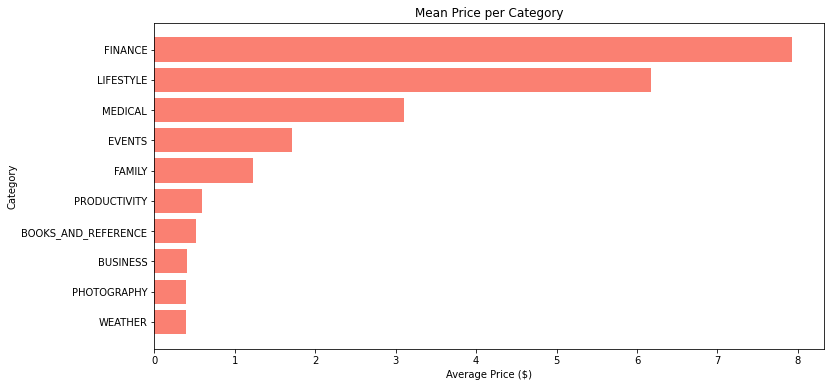

In [22]:
# Mean Price Per Category
category_price = dataset.groupby('Category')['Price'].mean().reset_index()
top_category_price = category_price.sort_values(by='Price', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_category_price['Category'], top_category_price['Price'], color='salmon')
plt.xlabel('Average Price ($)')
plt.ylabel('Category')
plt.title('Mean Price per Category')
plt.gca().invert_yaxis()
plt.show()

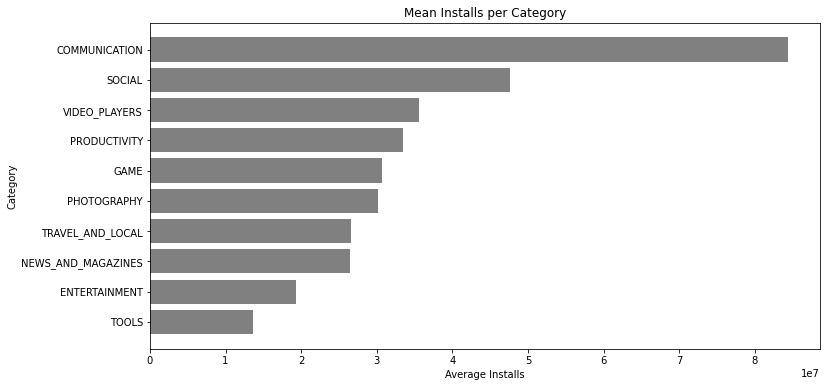

In [23]:
# Mean Installs per Category
category_price = dataset.groupby('Category')['Installs'].mean().reset_index()
top_category_price = category_price.sort_values(by='Installs', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_category_price['Category'], top_category_price['Installs'], color='grey')
plt.xlabel('Average Installs')
plt.ylabel('Category')
plt.title('Mean Installs per Category')
plt.gca().invert_yaxis()
plt.show()

In [24]:
most_expensive_apps = dataset.loc[dataset.groupby('Category')['Price'].idxmax()]
most_expensive_apps[['Category', 'App', 'Price']].head(10)

,Category,App,Price
4755,ART_AND_DESIGN,"X Launcher Pro: PhoneX Theme, OS11 Control Center",1.99
4697,AUTO_AND_VEHICLES,FORD V SERIES CALC - NO LIMIT,9.99
98,BEAUTY,Hush - Beauty for Everyone,0.00
10651,BOOKS_AND_REFERENCE,FN pistol model 1903 explained,6.49
9730,BUSINESS,Lean EQ,89.99
297,COMICS,LINE WEBTOON - Free Comics,0.00
4848,COMMUNICATION,Z PIVOT,19.99
481,DATING,AMBW Dating App: Asian Men Black Women Interra...,7.99
852,EDUCATION,Fuzzy Numbers: Pre-K Number Foundation,5.99
995,ENTERTAINMENT,My Talking Pet,4.99
